# Matrix Factorization Recommender System
Reference:  
https://medium.com/@rebirth4vali/implementing-matrix-factorization-technique-for-recommender-systems-from-scratch-7828c9166d3c  
https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b 

 

In [29]:
# get movie rating data
import pandas as pd
df = pd.read_csv("../datasets/movie_lens_1m/ratings.dat", nrows=100, sep="::", 
                 names= ['user', 'movie', 'rating', 'timestamp'])
# numpy pivot
# make user and movie rating by numpy
data_array = df.values #columns = (users, movies, ratings)
# list of users and movies
users = np.unique(data_array[:,0])
movies = np.unique(data_array[:, 1])
print(users, movies)
# users and movies arrays that will be used to match movie to index 
user_to_index = dict([(u, idx) for idx, u in enumerate(users)])
movie_to_indx = dict([(v, idx) for idx, v in enumerate(movies)])
user_mapping = np.vectorize(lambda x: user_to_index[x])
movie_mapping = np.vectorize(lambda x: movie_to_indx[x])
print(user_to_index)

# rating array
rating_array = np.zeros(shape=(len(users), len(movies)))
rating_array[
    user_mapping(data_array[:, 0]),
    movie_mapping(data_array[:, 1])
    ] = data_array[:, 2]
rating_array

[1 2] [   1   48  110  150  260  292  368  434  527  531  588  589  594  595
  608  647  648  661  720  745  783  902  914  919  938 1022 1028 1029
 1035 1097 1103 1188 1193 1197 1207 1210 1213 1217 1246 1253 1259 1270
 1287 1293 1357 1537 1544 1545 1566 1610 1687 1690 1721 1792 1834 1836
 1907 1961 1962 2018 2028 2126 2194 2236 2268 2278 2294 2321 2340 2355
 2398 2490 2628 2687 2692 2762 2791 2797 2804 2881 2916 2918 3030 3035
 3068 3071 3105 3107 3108 3114 3147 3186 3255 3256 3257 3408 3468 3471
 3578]
{1: 0, 2: 1}


/var/folders/48/yqrw73z93gj_n9qgspkbp0q0j3tz3h/T/ipykernel_39863/3484988515.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../datasets/movie_lens_1m/ratings.dat", nrows=100, sep="::",


array([[5., 5., 0., 5., 4., 0., 0., 0., 5., 4., 4., 0., 4., 5., 4., 0.,
        0., 3., 3., 3., 4., 0., 3., 4., 4., 5., 5., 5., 5., 4., 0., 0.,
        5., 3., 4., 0., 0., 0., 4., 0., 0., 5., 5., 0., 0., 0., 0., 4.,
        4., 0., 0., 0., 4., 0., 0., 5., 4., 5., 4., 4., 5., 0., 0., 0.,
        0., 0., 4., 3., 3., 5., 4., 0., 0., 3., 4., 4., 4., 4., 5., 0.,
        0., 4., 0., 0., 0., 0., 5., 0., 0., 4., 0., 4., 0., 0., 0., 4.,
        0., 0., 0.],
       [0., 0., 5., 0., 0., 3., 4., 2., 0., 0., 0., 4., 0., 0., 0., 3.,
        4., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 3., 4.,
        0., 0., 0., 4., 2., 3., 0., 3., 5., 0., 0., 5., 5., 4., 4., 0.,
        0., 5., 3., 3., 0., 3., 4., 0., 0., 0., 0., 0., 0., 3., 4., 5.,
        5., 3., 0., 0., 0., 0., 0., 3., 3., 0., 0., 0., 0., 0., 0., 3.,
        3., 0., 4., 4., 4., 4., 4., 2., 3., 0., 5., 0., 4., 2., 3., 0.,
        5., 5., 5.]])

In [32]:
rating_array.nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([ 0,  1,  3,  4,  8,  9, 10, 12, 13, 14, 17, 18, 19, 20, 22, 23, 24,
        25, 26, 27, 28, 29, 32, 33, 34, 38, 41, 42, 47, 48, 52, 55, 56, 57,
        58, 59, 60, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 81, 86, 89,
        91, 95,  2,  5,  6,  7, 11, 15, 16, 21, 30, 31, 35, 36, 37, 39, 40,
        43, 44, 45, 46, 49, 50, 51, 53, 54, 61, 62, 63, 64, 65, 71, 72, 79,
        80, 82, 83, 84, 85, 86, 87, 88, 90, 92, 93, 94, 96, 97, 98]))

---> Epoch 0
ave mse 0.727 ===> Total training time: 339.098 seconds.
---> Epoch 1
ave mse 0.673 ===> Total training time: 680.801 seconds.
---> Epoch 2
ave mse 0.645 ===> Total training time: 680.805 seconds.
---> Epoch 3
ave mse 0.626 ===> Total training time: 680.808 seconds.
---> Epoch 4
ave mse 0.611 ===> Total training time: 680.811 seconds.
---> Epoch 5
ave mse 0.598 ===> Total training time: 680.814 seconds.
---> Epoch 6
ave mse 0.585 ===> Total training time: 680.817 seconds.
---> Epoch 7
ave mse 0.573 ===> Total training time: 680.82 seconds.
---> Epoch 8
ave mse 0.561 ===> Total training time: 680.823 seconds.
---> Epoch 9
ave mse 0.549 ===> Total training time: 680.826 seconds.
---> Epoch 10
ave mse 0.538 ===> Total training time: 680.829 seconds.
---> Epoch 11
ave mse 0.527 ===> Total training time: 680.832 seconds.
---> Epoch 12
ave mse 0.516 ===> Total training time: 680.835 seconds.
---> Epoch 13
ave mse 0.505 ===> Total training time: 680.838 seconds.
---> Epoch 14
ave

AttributeError: 'MatrixFactorization' object has no attribute 'conv_epoch_num'

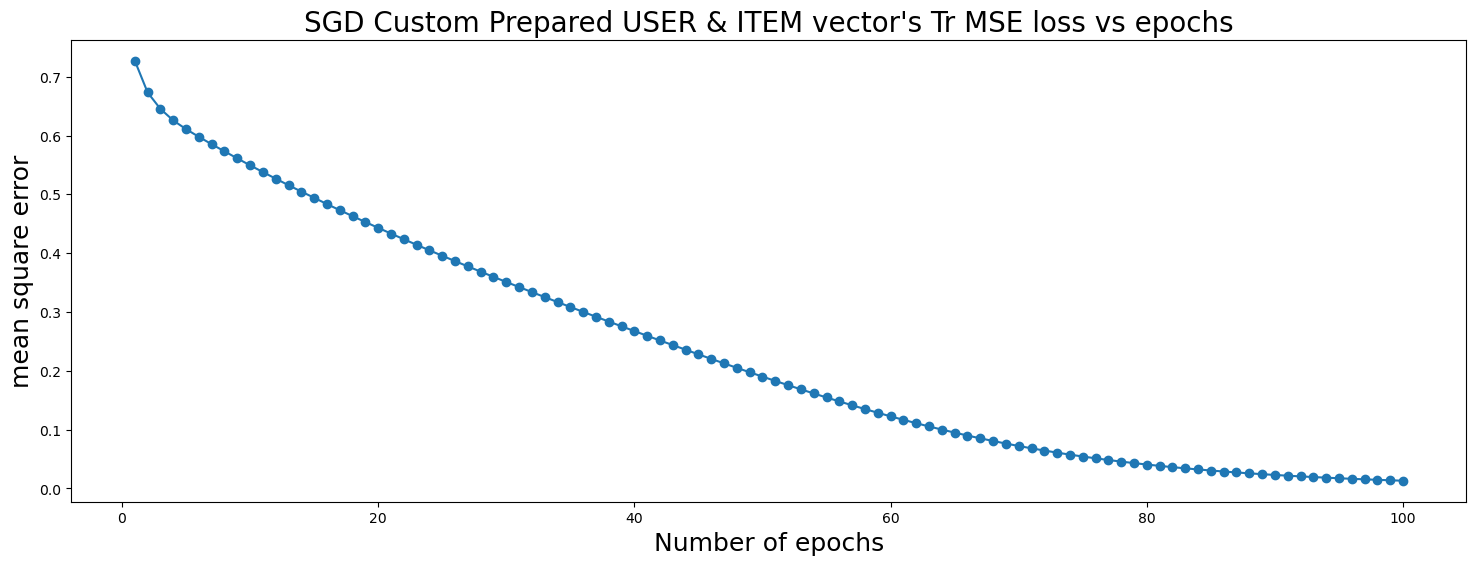

In [37]:
import time, numpy as np
import matplotlib.pyplot as plt

class MatrixFactorization():
    
    def __init__(self, ratings, n_factors=100, l_rate=0.01, alpha=0.01, n_iter=100):
        self.ratings = ratings
        self.n_users, self.n_items = ratings.shape
        self.non_zero_row_ind, self.non_zero_col_ind = ratings.nonzero()
        self.n_interac = len(ratings[np.where(ratings != 0)])
        self.ind_lst = list(range(self.n_interac))
        self.n_factors = n_factors
        self.l_rate = l_rate  # eta0 Constant that multiplies the update term
        self.alpha = alpha  # lambda Constant that multiplies the regularization term
        self.n_iter = n_iter
        self.mse_lst = []
        self.wait = 10
        self.tol = 1e-3
        self.n_iter_no_change = 10
        self.verbose = True
        self.stop = False
        
    def initialize(self, ):
        self.now = time.time()
        # Initialize Bias Values
        self.user_biases = np.zeros(self.n_users)
        self.item_biases = np.zeros(self.n_items)
        # initialize user & item vectors        
        self.user_vecs = np.random.normal(scale=1/self.n_factors, size=(self.n_users, self.n_factors))
        self.item_vecs = np.random.normal(scale=1/self.n_factors, size=(self.n_items, self.n_factors))
        # compute global bias
        self.global_bias = np.mean(self.ratings[np.where(self.ratings != 0)])
        self.evaluate_the_model(0)
        
        
    def predict(self, u, i):
        return self.global_bias+self.user_biases[u]+self.item_biases[i]+self.user_vecs[u]@self.item_vecs[i]
        
    def update_biases_and_vectors(self, error, u, i):
        # Update biases
        self.user_biases[u] += self.l_rate*(error - self.alpha*self.user_biases[u])
        self.item_biases[i] += self.l_rate*(error - self.alpha*self.item_biases[i])
        # Update User and item Vectors
        self.user_vecs[u, :] += self.l_rate*(error*self.item_vecs[i, :] - self.alpha*self.user_vecs[u, :])
        self.item_vecs[i, :] += self.l_rate*(error*self.user_vecs[u, :] - self.alpha*self.item_vecs[i, :])
        
    def evaluate_the_model(self, epoch):
        tot_square_error = 0
        for index in self.ind_lst:
            # Extracting user item information indices in which we have a rating
            u, i = self.non_zero_row_ind[index], self.non_zero_col_ind[index]
            pred_rat = self.predict(u, i)
            tot_square_error += (self.ratings[u, i]-pred_rat)**2
        mse = tot_square_error/self.n_interac
        self.mse_lst.append(mse)
        if self.verbose: 
            print(f"---> Epoch {epoch}")
            temp = np.round(time.time()-self.now, 3)
            print(f"ave mse {np.round(self.mse_lst[-1], 3)} ===> Total training time: {temp} seconds.")
        
    def early_stopping(self, epoch):
        if (self.mse_lst[-2] - self.mse_lst[-1]) <= self.tol:
            if self.wait == self.n_iter_no_change:
                temp = np.round(time.time()-self.now, 3)
                if self.verbose: print(f"Convergence after {epoch} epochs time took: {temp} seconds.")
                self.stop = True
                self.conv_epoch_num = epoch
            self.wait += 1
        else:
            self.wait = 0
        
    def fit(self, ):
        self.initialize()
        for epoch in range(1, self.n_iter):
            np.random.shuffle(self.ind_lst)
            if self.stop == False:
                for index in self.ind_lst:
                    # Extracting user item information indices in which we have a rating
                    u, i = self.non_zero_row_ind[index], self.non_zero_col_ind[index]
                    pred_rat = self.predict(u, i)
                    error = self.ratings[u, i]-pred_rat
                    self.update_biases_and_vectors(error, u, i)
                self.evaluate_the_model(epoch)
                self.early_stopping(epoch)
        self.plot_the_score()
                
    def plot_the_score(self, ):
        plt.figure(figsize=(18,6))
        plt.plot(range(1, 1+len(self.mse_lst)), self.mse_lst, marker='o')
        plt.title("SGD Custom Prepared USER & ITEM vector's Tr MSE loss vs epochs", fontsize=20)
        plt.xlabel('Number of epochs', fontsize=18)
        plt.ylabel('mean square error', fontsize=18)
        plt.xticks(range(1, self.conv_epoch_num+5), fontsize=15, rotation=90)
        plt.yticks(np.linspace(min(self.mse_lst), max(self.mse_lst),15), fontsize=15)
        plt.grid()
        plt.show()

mf = MatrixFactorization(ratings=rating_array)
mf.fit()


---> Epoch 0
ave mse 0.727 ===> Total training time: 19.558 seconds.


KeyboardInterrupt: 